In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Name : Vaishnavi Gonela
#Student Number : 202003912
#Stfx Email : x2020dxw@stfx.ca


# Read the Train and Test datasets

In [3]:
train_data=pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
test_data=pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


# Visualization of data

In [5]:
import matplotlib.pyplot as ply
%matplotlib inline

def bar_chart(feature):
    Survived=train_data[train_data['Survived']==1][feature].value_counts()
    Dead=train_data[train_data['Survived']==0][feature].value_counts()
    df=pd.DataFrame([Survived,Dead])
    df.index=['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

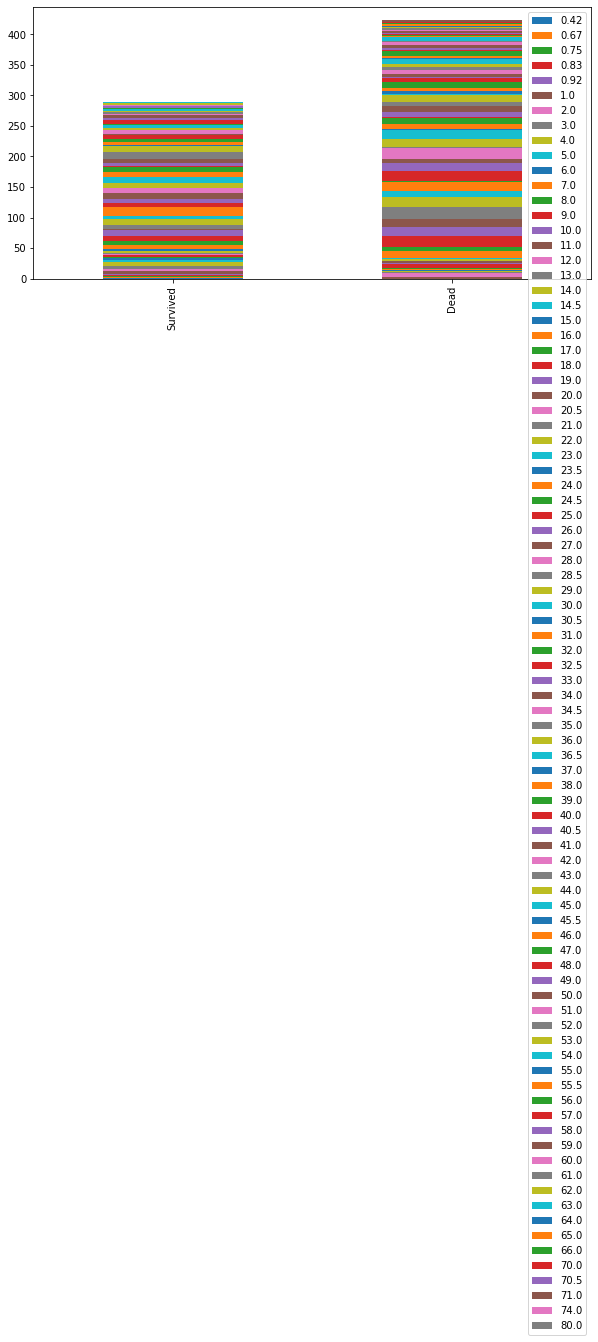

In [6]:
bar_chart('Age')


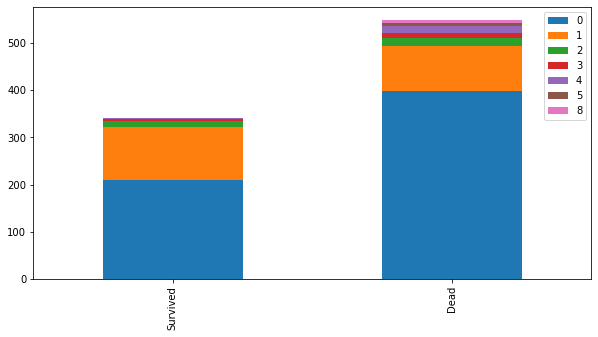

In [7]:
bar_chart('SibSp')


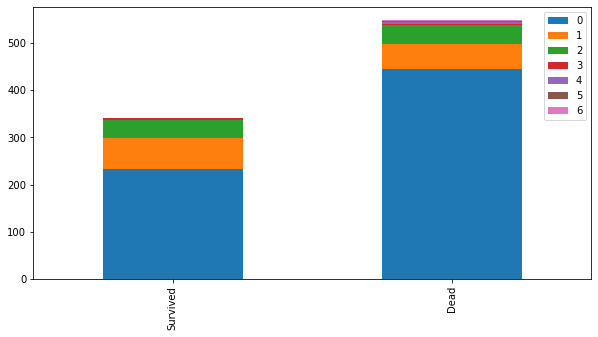

In [8]:
bar_chart('Parch')


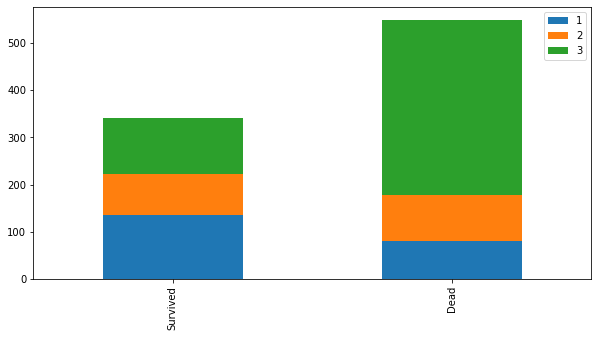

In [9]:
bar_chart('Pclass')


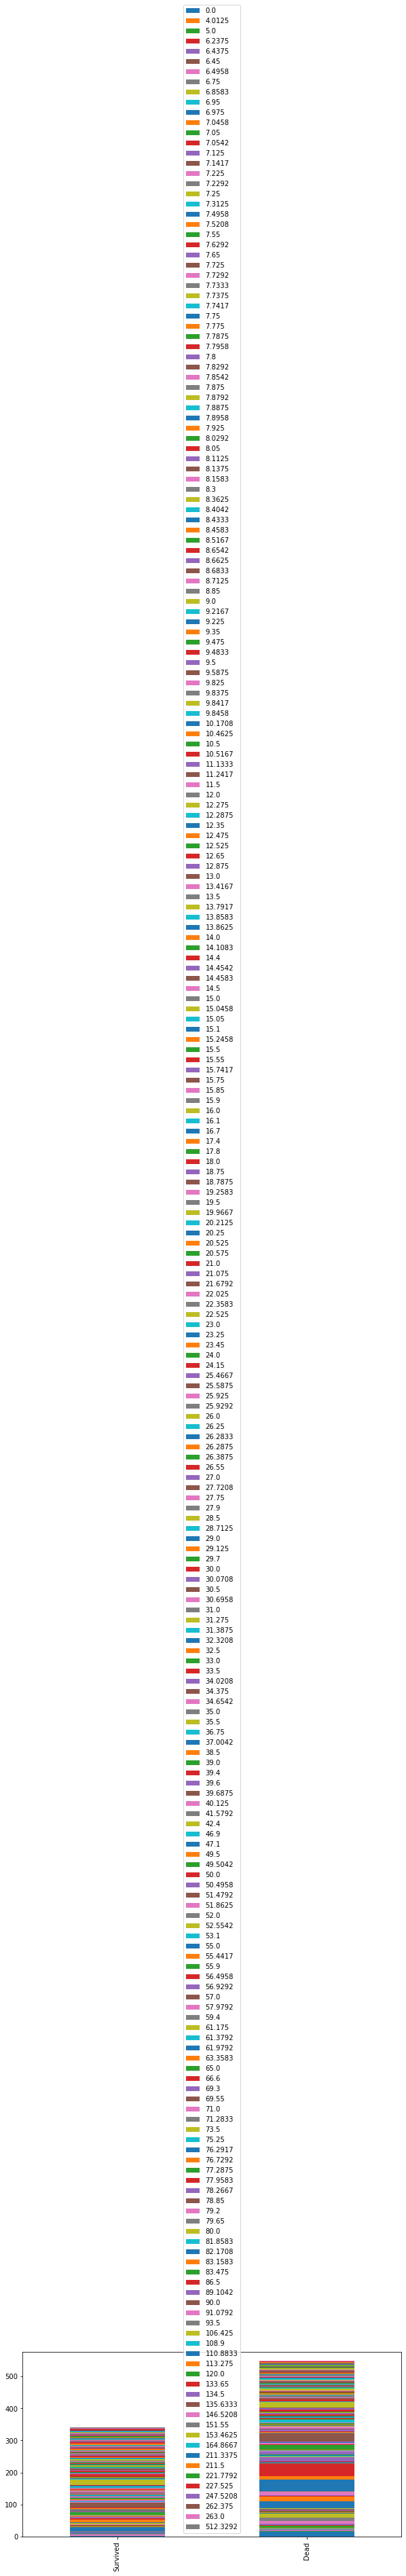

In [10]:
bar_chart('Fare')


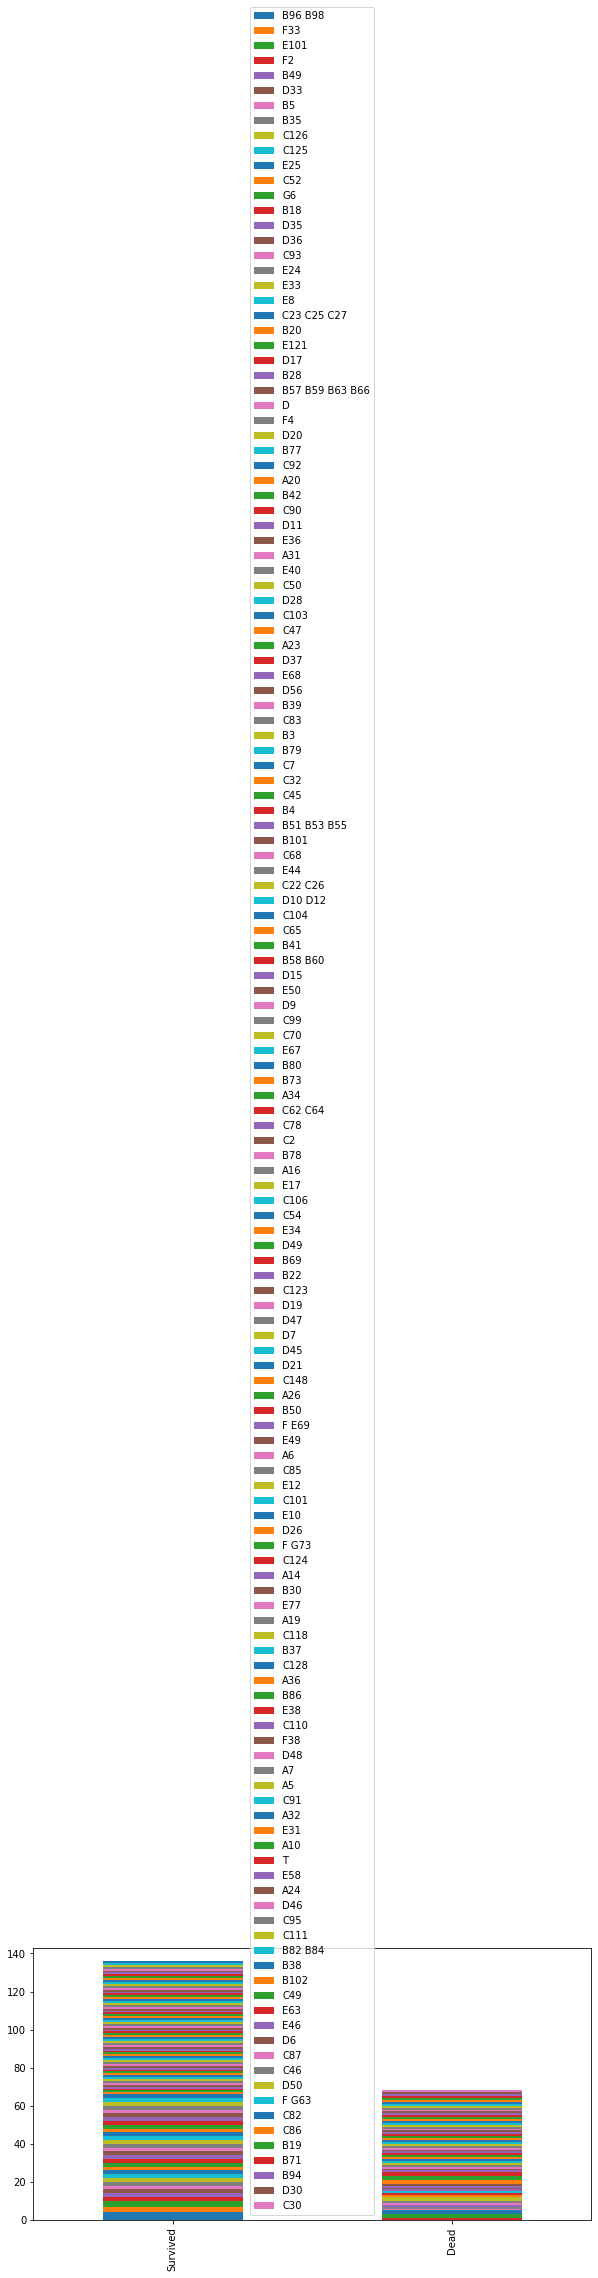

In [11]:
bar_chart('Cabin')


# Filling The Missing Values

In [12]:
data=[train_data,test_data]

for dataset in data:
    dataset.Embarked=dataset.Embarked.fillna('S')
    dataset.Age=dataset.Age.fillna(dataset.Age.mean())
    dataset.Fare=dataset.Fare.fillna(dataset.Fare.mean())


# Feature Engineering


In [13]:
for dataset in data:
    dataset['FamilySize']=dataset['SibSp']+dataset['Parch']+1


In [14]:
for dataset in data:
    dataset['Title']=dataset.Name.str.extract('([A-Za-z]+)\.',expand=False)

In [15]:
train_data['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Don           1
Capt          1
Lady          1
Ms            1
Jonkheer      1
Sir           1
Mme           1
Countess      1
Name: Title, dtype: int64

In [16]:
test_data['Title'].value_counts()


Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

In [17]:
title_mapping={"Mr":0,"Miss":1,"Mrs":2,"Master":3,"Rev":3,"Col":3,"Dona":3,"Ms":3,"Dr":3}

for dataset in data:
    dataset['Title']=dataset['Title'].map(title_mapping)



In [18]:
for dataset in data:
    dataset['Age_b']=pd.cut(dataset['Age'],bins=[0,12,20,40,120],labels=['Childrens','Teenagers','Majors','Elders'])

In [19]:
for dataset in data:
    dataset['Fare_b']=pd.cut(dataset['Fare'],bins=[0,7.91,14.45,31,120],labels=['Low_fare','Medium_fare','Moderate_Fare','High_fare'])


# Deleting the values that we are not using for the prediction¶


In [20]:
train_data.drop(['Name','Age','Ticket','Fare','Cabin'],inplace=True,axis=1)
test_data.drop(['Name','Age','Ticket','Fare','Cabin'],inplace=True,axis=1)
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Sex          891 non-null    object  
 4   SibSp        891 non-null    int64   
 5   Parch        891 non-null    int64   
 6   Embarked     891 non-null    object  
 7   FamilySize   891 non-null    int64   
 8   Title        880 non-null    float64 
 9   Age_b        891 non-null    category
 10  Fare_b       838 non-null    category
dtypes: category(2), float64(1), int64(6), object(2)
memory usage: 64.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-

# Converting the Datatypes

In [21]:
train_data=pd.get_dummies(train_data,columns=["Sex","Title","Embarked","Age_b","Fare_b"],prefix=["Sex","Title","Em_type","Age_type","Fare_type"])
test_data=pd.get_dummies(test_data,columns=["Sex","Title","Embarked","Age_b","Fare_b"],prefix=["Sex","Title","Em_type","Age_type","Fare_type"])
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   PassengerId              891 non-null    int64
 1   Survived                 891 non-null    int64
 2   Pclass                   891 non-null    int64
 3   SibSp                    891 non-null    int64
 4   Parch                    891 non-null    int64
 5   FamilySize               891 non-null    int64
 6   Sex_female               891 non-null    uint8
 7   Sex_male                 891 non-null    uint8
 8   Title_0.0                891 non-null    uint8
 9   Title_1.0                891 non-null    uint8
 10  Title_2.0                891 non-null    uint8
 11  Title_3.0                891 non-null    uint8
 12  Em_type_C                891 non-null    uint8
 13  Em_type_Q                891 non-null    uint8
 14  Em_type_S                891 non-null    uint8
 15  Age_ty

In [22]:
x=train_data.drop(['PassengerId','Survived'],axis=1)
y=train_data['Survived']


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=21)


# Support Vector Classifier

In [24]:
from sklearn.metrics import accuracy_score #accuracy score
from sklearn.svm import SVC
Sclf=SVC()
Sclf.fit(x_train,y_train)


SVC()

In [25]:
Sclf.score(x_train,y_train)


0.8330658105939005

In [26]:
Sclf.score(x_test,y_test)

0.835820895522388

# Grid search and Cross Validation

In [27]:
from sklearn.model_selection import GridSearchCV
parameters={'kernel':('linear','rbf'),'C':(1,100,0.25,0.75,0.5),'gamma':(0.1,0.2,0.3,0.4,0.5,1,'auto'),'decision_function_shape':('ovo','ovr'),'shrinking':(True,False)}
grid_search=GridSearchCV(estimator=Sclf,
                        param_grid=parameters,
                        scoring='accuracy',
                        cv=3,
                       n_jobs=-1)
grid_search=grid_search.fit(x_train,y_train)



In [28]:
accuracy=grid_search.best_score_
accuracy

0.828270159791899

In [29]:
grid_search.best_params_


{'C': 0.5,
 'decision_function_shape': 'ovo',
 'gamma': 0.2,
 'kernel': 'rbf',
 'shrinking': True}

In [30]:
Sclf=SVC(kernel='rbf',decision_function_shape= 'ovo',)
Sclf.fit(x_train,y_train)


SVC(decision_function_shape='ovo')

In [31]:
Sclf.score(x_train,y_train)

0.8330658105939005

In [32]:
Sclf.score(x_test,y_test)

0.835820895522388

# PREDICTION

In [33]:
all_test=test_data.drop(['PassengerId'],axis=1)


In [34]:
all_test_pred=Sclf.predict(all_test).astype(int)
all_test_pred


array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [35]:
output=pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': all_test_pred})
output.to_csv("my.submission14.csv",index=False)
print("your submission was succesfull")


your submission was succesfull
